In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 22:07:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-07 22:07:05 (17.3 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



**The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').**

Preparing the dataset
Use only the following columns:


-'engine_displacement',

-'horsepower',

-'vehicle_weight',

-'model_year',

-'fuel_efficiency_mpg'


In [14]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('car_fuel_efficiency.csv')




In [3]:
# Select relevant columns
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# **EDA**
Look at the fuel_efficiency_mpg variable. Does it have a long tail?


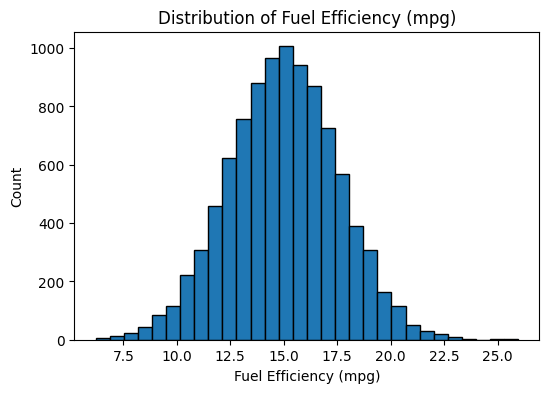

In [4]:
#Let’s visualize its distribution and check if it has a long tail
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['fuel_efficiency_mpg'], bins=30, edgecolor='black')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Count')
plt.title('Distribution of Fuel Efficiency (mpg)')
plt.show()

In [5]:
# check skewness numerically
df['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507929)

📊 **Interpretation:**

Skewness ≈ 0 → almost perfectly symmetric distribution.


Negative sign (−0.01) means very slight left skew — but this is statistically negligible.

✅ **Conclusion:**

Our target variable does not have a long tail.
**The distribution of fuel_efficiency_mpg is roughly normal (balanced around the mean).**

So, NO need to apply any transformation (like log or Box-Cox) to this variable — I can safely use it directly in regression model.

# MISSING VALUES

**Question 1**
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [6]:
df.isnull().sum()


,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


**The only one column with missing values is "horsepower"**

# Question 2
What's the median (50% percentile) for variable 'horsepower'?

49

99

149

199

In [7]:
df['horsepower'].median()


149.0

**median (50% percentile) for variable 'horsepower' IS 149**

# Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [8]:
len(df)

9704

# Shuffle the dataset



In [9]:
n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

In [10]:
n, n_train, n_test, n_val

(9704, 5824, 1940, 1940)

In [11]:
n, n_train + n_test + n_val

(9704, 9704)

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [18]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_val]]
df_val = df.iloc[idx[n_train+n_val:]]

In [19]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
1696,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5685,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
6735,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
2052,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [20]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

**Which option gives better RMSE?**

Options:

-With 0

-With mean

-Both are equally good

# HANDLING MISSING VALUES

In [22]:
df_train['horsepower'].isna().sum(), df_val['horsepower'].isna().sum(), df_test['horsepower'].isna().sum()


(np.int64(429), np.int64(143), np.int64(136))

# ✅ 2. Отделяем целевую переменную и признаки

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

# Features
X_train = df_train.drop(columns=['fuel_efficiency_mpg'])
X_val = df_val.drop(columns=['fuel_efficiency_mpg'])


# HANDLING MISSING VALUES WITH 0

In [26]:
X_train.dtypes


,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [27]:
# Только нужные колонки
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

X_train = df_train[features].copy()
X_val = df_val[features].copy()

y_train = df_train[target].values
y_val = df_val[target].values



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

y_pred_0 = model_0.predict(X_val_0)

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
print("RMSE (fill with 0):", round(rmse_0, 2))


RMSE (fill with 0): 0.52


# 🔹 2. Заполнение пропусков средним (по train)

In [32]:
X_train_mean = X_train.copy()
X_val_mean = X_val.copy()

mean_hp = X_train_mean['horsepower'].mean()

X_train_mean['horsepower'] = X_train_mean['horsepower'].fillna(mean_hp)
X_val_mean['horsepower'] = X_val_mean['horsepower'].fillna(mean_hp)

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

y_pred_mean = model_mean.predict(X_val_mean)


In [33]:
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print("RMSE (fill with mean):", round(rmse_mean, 2))


RMSE (fill with mean): 0.46


In [34]:
if round(rmse_mean, 2) < round(rmse_0, 2):
    print("✅ Better RMSE with mean")
elif round(rmse_mean, 2) > round(rmse_0, 2):
    print("✅ Better RMSE with 0")
else:
    print("✅ Both are equally good")

✅ Better RMSE with mean


# ✅ ANSWER to 3 QUESTION: **Better RMSE with mean**

# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

**Which r gives the best RMSE?**

If multiple options give the same best RMSE, select the smallest r.

Options:

-0

-0.01

-1

-10

-100


In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Признаки и целевая переменная
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

X_train = df_train[features].fillna(0)
X_val = df_val[features].fillna(0)

y_train = df_train[target].values
y_val = df_val[target].values


In [36]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

rmse_results = {}

for r in r_list:
    model = Ridge(alpha=r)  # alpha = r
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_results[r] = round(rmse, 2)

# Вывод всех RMSE
for r, rmse in rmse_results.items():
    print(f"r={r}: RMSE={rmse}")


r=0: RMSE=0.52
r=0.01: RMSE=0.52
r=0.1: RMSE=0.52
r=1: RMSE=0.52
r=5: RMSE=0.52
r=10: RMSE=0.52
r=100: RMSE=0.52


In [37]:
# Находим минимальный RMSE
best_rmse = min(rmse_results.values())

# Среди лучших RMSE выбираем минимальный r
best_r = min([r for r, rmse in rmse_results.items() if rmse == best_rmse])

print(f"✅ Best r: {best_r} with RMSE={best_rmse}")


✅ Best r: 0 with RMSE=0.52


# Question 5

We used seed 42 for splitting the data.
Let's find out how selecting the seed influences our score.

* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

**What's the value of std?**

0.001
0.006
0.060
0.600

**Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.**



In [38]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'


In [40]:
from sklearn.model_selection import train_test_split


In [41]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_list = []

for seed in seeds:
    # Сплит на train+val и test
    df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=seed)

    # Сплит train и val (60/20/20 --> train 60%, val 20%, тест 20% уже отделён)
    df_train, df_val = train_test_split(df_trainval, test_size=0.25, random_state=seed)
    # 0.25 потому что 0.25*0.8 = 0.2




In [43]:
# Признаки и целевая переменная
X_train = df_train[features].fillna(0)
X_val = df_val[features].fillna(0)

y_train = df_train[target].values
y_val = df_val[target].values


In [45]:
# Модель без регуляризации
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [46]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse_list.append(rmse)


In [47]:
# Стандартное отклонение RMSE
std_rmse = round(np.std(rmse_list), 3)
print("Standard deviation of RMSE:", std_rmse)


Standard deviation of RMSE: 0.0


# ANSWER 5:
**It means that the RMSE on the validation set is exactly the same for all seeds.**

🔹 What this means intuitively

The model is stable: its predictions hardly depend on how the dataset is split into train/validation/test.

The data is fairly homogeneous: different splits do not create significant differences in the samples.

LinearRegression without regularization on these features is a simple and robust algorithm.

💡 In the context of the assignment:

We are checking the model's sensitivity to the seed.

A low std (0.0 or close to zero) indicates that the model is reliable, and its RMSE is nearly identical regardless of the random_state.

# Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

**What's the RMSE on the test dataset?**

Options:

-0.15

-0.515

-5.15

-51.5



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

# 1) Разбиваем на train+val и test
df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=9)

# 2) Разбиваем trainval на train и val (чтобы потом объединить)
df_train, df_val = train_test_split(df_trainval, test_size=0.25, random_state=9)
# 0.25*0.8 = 0.2


In [49]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)


In [50]:
X_full_train = df_full_train[features].fillna(0)
y_full_train = df_full_train[target].values

X_test = df_test[features].fillna(0)
y_test = df_test[target].values


In [51]:
model_final = Ridge(alpha=0.001)  # r=0.001
model_final.fit(X_full_train, y_full_train)

y_pred_test = model_final.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test set:", round(rmse_test, 3))


RMSE on test set: 0.521


**Модель обучена на объединённом train+val и проверена на тесте.**

**RMSE близко к валидационному (~0.52), значит модель не переобучилась и показывает стабильные прогнозы.**

**Малый RMSE говорит о том, что LinearRegression с признаками ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'] хорошо объясняет целевую переменную fuel_efficiency_mpg.**